In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('/content/drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

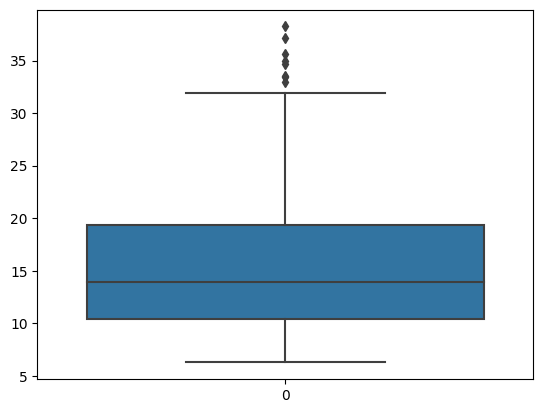

In [12]:
sns.boxplot(df['Na_to_K'])

In [13]:
q1 = df['Na_to_K'].quantile(0.25)
q3 = df['Na_to_K'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr

In [17]:
df['Na_to_K'] = np.where(df['Na_to_K']>upper_limit,13.93575,df['Na_to_K'])

<Axes: >

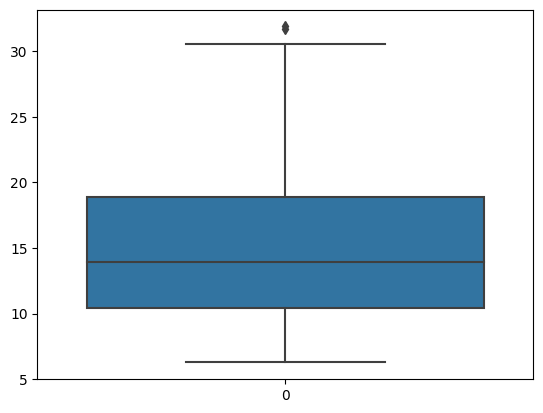

In [18]:
sns.boxplot(df['Na_to_K'])

<Axes: >

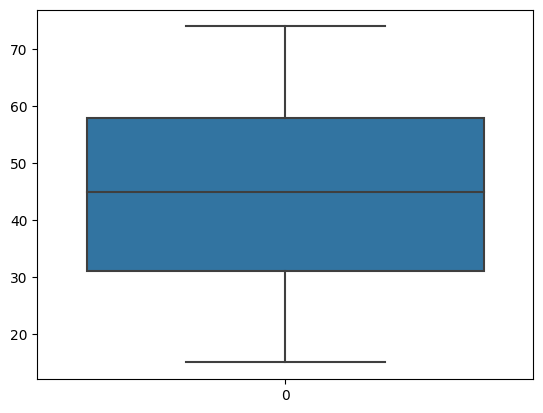

In [19]:
sns.boxplot(df['Age'])

In [20]:
x = df.iloc[:,0:5]
y = df['Drug']

In [21]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)

In [23]:
le = LabelEncoder()
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtest['Sex'] = le.transform(xtest['Sex'])

In [24]:
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtest['BP'] = le.transform(xtest['BP'])

In [25]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])

In [26]:
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
176,48,1,0,1,10.446
111,47,0,2,1,6.683
114,20,0,2,1,9.281
14,50,0,2,0,12.703
106,22,1,2,0,11.953
...,...,...,...,...,...
120,28,1,2,0,27.064
112,35,1,1,1,9.170
48,23,1,2,0,31.686
4,61,0,1,0,18.043


In [31]:
ytrain

176    drugA
111    drugX
114    drugX
14     drugX
106    drugX
       ...  
120    DrugY
112    drugX
48     DrugY
4      DrugY
56     drugB
Name: Drug, Length: 160, dtype: object

In [32]:
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [33]:
ytrain

array([1, 4, 4, 4, 4, 2, 4, 3, 0, 4, 1, 1, 2, 0, 4, 0, 0, 4, 0, 0, 1, 4,
       0, 0, 4, 4, 3, 4, 1, 0, 1, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 2, 4, 2, 1, 4, 0, 4, 0, 0, 2, 4, 1, 3, 0, 0, 0, 4,
       0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 3, 2, 4, 3, 4, 4, 0, 4, 3, 0, 4,
       4, 0, 4, 0, 0, 0, 4, 0, 1, 3, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 1,
       4, 4, 1, 4, 3, 4, 1, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 3,
       4, 2, 4, 0, 2, 0, 3, 0, 1, 0, 4, 0, 3, 1, 4, 0, 1, 0, 1, 4, 0, 0,
       0, 0, 4, 0, 0, 2])

In [30]:
drug_model = Sequential()

In [41]:
drug_model.add(Dense(5,activation='relu'))
drug_model.add(Dense(64,activation='relu'))
drug_model.add(Dense(64,activation='relu'))
drug_model.add(Dense(32,activation='relu'))
drug_model.add(Dense(32,activation='relu'))
drug_model.add(Dense(20,activation='relu'))
drug_model.add(Dense(20,activation='relu'))
drug_model.add(Dense(16,activation='relu'))
drug_model.add(Dense(16,activation='relu'))
drug_model.add(Dense(5,activation='softmax'))

In [42]:
drug_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
drug_model.fit(xtrain,ytrain,epochs=25,batch_size=4,validation_data=(xtest,ytest))

Epoch 1/25
40/40 [==============================] - 4s 12ms/step - loss: 1.5837 - accuracy: 0.4375 - val_loss: 1.5337 - val_accuracy: 0.5250
Epoch 2/25
40/40 [==============================] - 0s 5ms/step - loss: 1.4329 - accuracy: 0.4375 - val_loss: 1.2494 - val_accuracy: 0.5250
Epoch 3/25
40/40 [==============================] - 0s 5ms/step - loss: 1.2398 - accuracy: 0.6000 - val_loss: 1.1229 - val_accuracy: 0.6750
Epoch 4/25
40/40 [==============================] - 0s 4ms/step - loss: 1.1133 - accuracy: 0.6125 - val_loss: 1.3133 - val_accuracy: 0.5500
Epoch 5/25
40/40 [==============================] - 0s 4ms/step - loss: 1.0843 - accuracy: 0.6687 - val_loss: 1.0986 - val_accuracy: 0.6500
Epoch 6/25
40/40 [==============================] - 0s 5ms/step - loss: 1.0646 - accuracy: 0.6250 - val_loss: 1.2964 - val_accuracy: 0.4250
Epoch 7/25
40/40 [==============================] - 0s 7ms/step - loss: 1.0158 - accuracy: 0.6625 - val_loss: 1.0997 - val_accuracy: 0.5500
Epoch 8/25
40/40 [=

In [46]:
a = drug_model.predict([[61,0,1,1,9.112]])

1/1 [==============================] - 0s 37ms/step


In [48]:
b = np.argmax(a)
name = le.inverse_transform([b])

In [50]:
name

array(['drugX'], dtype=object)